**Exercise 6: Support Vector Machines**

In [366]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import scipy
from random import randint
from scipy.io import loadmat
from scipy.optimize import minimize
from sklearn.preprocessing import normalize
from math import sqrt
from __future__ import division
import seaborn as sns
import warnings
from IPython.display import display
from sklearn.preprocessing import PolynomialFeatures, normalize, MinMaxScaler
from sklearn.svm import SVC
%matplotlib inline
sns.set_style("darkgrid")

In [367]:
data1, data2, data3 = loadmat('ex6data1.mat'), loadmat('ex6data2.mat'), loadmat('ex6data3.mat')
print data1.keys()
print data2.keys()
print data3.keys()

X1, y1, X2, y2, X3, y3 = map(np.array, (data1['X'], data1['y'], data2['X'], data2['y'], data3['X'], data3['y']))

['y', 'X', '__version__', '__header__', '__globals__']
['y', 'X', '__version__', '__header__', '__globals__']
['yval', '__header__', '__globals__', 'Xval', 'y', 'X', '__version__']


In [368]:
def plot_pos_neg(X, y, ax=None):
    if ax == None:
        fig = plt.figure()
        fig.add_axes()
        ax = fig.add_subplot(1, 1, 1)
    
    pos = X[np.c_[y == 1, y == 1]].reshape(-1, X.shape[1])
    neg = X[np.c_[y == 0, y == 0]].reshape(-1, X.shape[1])

    ma = max(pos.max(), neg.max())
    mi = min(pos.min(), neg.min())

    ax.scatter(pos[:, 0], pos[:, 1], marker='+', color='k')
    ax.scatter(neg[:, 0], neg[:, 1], marker='o', color='y')
    
def plot_contour(*args):
    fig = plt.figure()
    fig.add_axes()
    i = 0
    
    for a in args:
        if len(args) > 1:
            ax = fig.add_subplot(2, 2, i+1) 
        else:
            ax = fig.add_subplot(1, 1, 1)
        
        i += 1
        X, y, clf =(a)
        x_min, x_max = X[:, 0].min() - 0.25, X[:, 0].max() + 0.25
        y_min, y_max = X[:, 1].min() - 0.25, X[:, 1].max() + 0.25
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, .02))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

        ax.contourf(xx, yy, Z, cmap=cmap, alpha=.6, levels=[0, 0.5, 1])
        plot_pos_neg(X, y, ax)

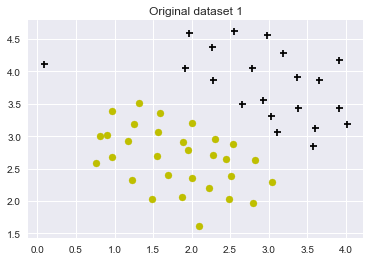

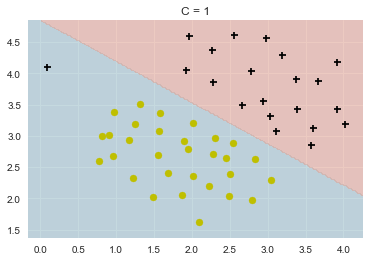

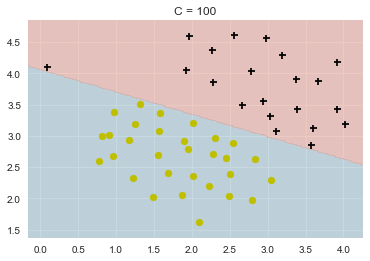

In [369]:
plot_pos_neg(X1, y1)
plt.title('Original dataset 1')

svm = SVC(kernel='linear', C=1)
m1 = svm.fit(X1, y1.ravel())
svm = SVC(kernel='linear', C=100)
m100 = svm.fit(X1, y1.ravel())

plot_contour((X1, y1, m1))
plt.title('C = 1')
plot_contour((X1, y1, m100))
plt.title('C = 100')

In [370]:
def GaussianKernel(x1, x2, sigma=2):
    sq = (x1 - x2).T.dot(x1 - x2)
    return - np.exp(- sq / (sigma**2 *2 ))

# Test kernel
print GaussianKernel(np.array([1, 2, 1]), np.array([0, 4, -1]), 2)

-0.324652467358


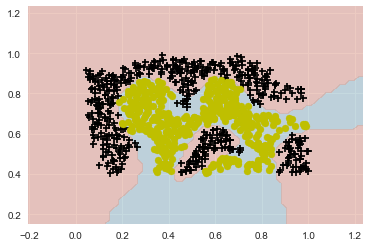

In [371]:
svm = SVC(C=100, kernel='rbf', gamma=10)
m = svm.fit(X2, y2.ravel())
plot_contour((X2, y2, m))

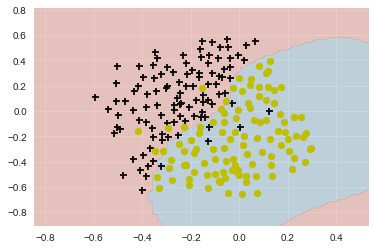

In [379]:
svm = SVC(C=50, gamma=10,kernel='rbf')
m = svm.fit(X3, y3.ravel())
plot_contour((X3, y3, m))

In [396]:
sTrain = loadmat('spamTrain.mat')
sTest  = loadmat('spamTest.mat')

print sTrain.keys(), sTest.keys()
Xtr, ytr, Xte, yte = map(np.array, (sTrain['X'], sTrain['y'], sTest['Xtest'], sTest['ytest']))

print Xtr.shape, Xte.shape, ytr.shape, yte.shape

svm = SVC(kernel='rbf')
m = svm.fit(Xtr, ytr.ravel())
p = m.predict(Xte)
print (p == yte).shap/(yte.shape[0])

['y', 'X', '__version__', '__header__', '__globals__'] ['ytest', 'Xtest', '__version__', '__header__', '__globals__']
(4000, 1899) (1000, 1899) (4000, 1) (1000, 1)
[[ 0.001  0.     0.    ...,  0.     0.001  0.   ]
 [ 0.     0.001  0.001 ...,  0.001  0.     0.001]
 [ 0.     0.001  0.001 ...,  0.001  0.     0.001]
 ..., 
 [ 0.     0.001  0.001 ...,  0.001  0.     0.001]
 [ 0.001  0.     0.    ...,  0.     0.001  0.   ]
 [ 0.     0.001  0.001 ...,  0.001  0.     0.001]]


In [398]:
print (p == ytr).shape[0]/(ytr.shape[0])

1.0
